In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

# Discrete stochastic processes

## Literature

 - [Gardiner, Handbook of stochastic methods](https://link.springer.com/book/9783540707127)

## Markov Processes and the Chapman-Kolmogorov equation
Consider a time dependent random variable $x$ whose values are observed at times $t_1, \ldots t_n$. 
The trajectory could for example look like this:
![image](./figures/stochastic_trajectory.png)

The joint probability of any such series of observations can be written in terms of conditional probabilities as 
$$
P\left(\{x_n,t_n\}; \{x_{n-1}, t_{n-1}\}; \ldots; \{x_1, t_1\}\right)
= P\left(\{x_n,t_n\}| \{x_{n-1}, t_{n-1}\}; \ldots; \{x_1, t_1\}\right) 
  \times P\left(\{x_{n-1}, t_{n-1}\}; \ldots; \{x_1, t_1\}\right)
$$


In a [Markovian](https://en.wikipedia.org/wiki/Andrey_Markov) process, the conditional probablity of $\{x_n, t_n\}$ only depends only on the previous time point and there is no "memory" from earlier times: 
$$
P\left(\{x_n,t_n\}| \{x_{n-1}, t_{n-1}\}; \ldots; \{x_1, t_1\}\right) = P\left(\{x_n,t_n\}| \{x_{n-1}, t_{n-1}\}\right)
$$
In the context of the sketch above, this means that the distribution at $t_n$ is fully determined by the state at $t_{n-1}$. 

This property will be key for our ability to analyze stochastic processes in terms of differential equations, where the evolution of the state is determined by the current state.

We will primarily consider a discrete state space here, but similar arguments can be made for the continuous case. 
From the Markov property, it follows that
$$
\begin{split}
P\left(\{x_3,t_3\}| \{x_{1}, t_{1}\}\right) & = \sum_{x_2} P\left(\{x_3,t_3\}; \{x_2,t_2\}| \{x_{1}, t_{1}\}\right) \\
&= \sum_{x_2} P\left(\{x_3,t_3\}| \{x_2,t_2\}\right)\times  P\left(\{x_2,t_2\}|\{x_{1}, t_{1}\}\right)
\end{split}
$$
This property is quite intuitive: The probability of getting from $x_1$ to $x_3$ can be expressed via the sum (or integral) over all possible states $x_2$ at some intermediate time $t_2$. By choosing the $t_2 = t_3 - \Delta t$ or $t_2 = t_1 + \Delta t$, we can derive differential equations with respect to the final (forward) or initial (backward) state. 

## Forward equation
To derive an evolution equation for the probability distribution, let's consider  integrating over $t - \Delta t$ and Taylor expand:
$$
\begin{split}
P\left(\{x,t\}| \{x_{0}, t_{0}\}\right) & =\sum_y P\left(\{x,t\}| \{y,t - \Delta t \}\right)\times  P\left(\{y,t - \Delta t\}|\{x_{0}, t_{0}\}\right) \\
& = \sum_y \left[ \delta_{xy} + Q_{xy}(t)\Delta t\right] \times  
\left[ P\left(\{y,t\}|\{x_{0}, t_{0}\}\right) - \Delta t\frac{d}{dt} P\left(\{y,t\}|\{x_{0}, t_{0}\} \right)\right]
\end{split}
$$
The last line implies the intuition that over a short time in a discrete state space, the systems stays in the same state in most cases and the probability to switch is linear in $\Delta t$.
Notice how the (off-diagonal) elements of the $Q_{xy}(t) = \frac{d}{dt} P(\{x,t+\Delta\}|\{y,t\})$ matrix represent transition rates from state $y$ to state $x$.
Rearranging this leads to a linear equation for the probability distribution:
$$
\frac{d}{dt} P\left(\{x,t\}|\{x_{0}, t_{0}\} \right) = \sum_y Q_{xy}(t)P\left(\{y,t\}|\{x_{0}, t_{0}\}\right)
$$
For a discrete set of states $x\in X$, this equation is most naturally written as a system of linear equations in matrix-vector notation. 

## Time invariant Markov Chains and Master equations
Consider a system that can be in $n$ discrete states (e.g. the bases A,C,G,T of a position in DNA sequence). The state of the system can change as a Markovian jump process. 

![image](./figures/discrete_stochastic_process.png)

Given the system is in state $i$ at time $t$, the probability to find it in state $j$ at time $t+\Delta t$ is 
$$
p_j(t+\Delta t) = \begin{cases} Q_{ji}\Delta t & j\neq i \\ 1-\Delta t\sum_{k\neq j} Q_{kj} & j=i \end{cases}
$$
This problem is readily recast as a differential equation, often called [Master equation](https://en.wikipedia.org/wiki/Master_equation)
$$
\frac{d p_j}{dt} = Q_{ji}p_i
$$
where $Q_{ji}$ is the rate of change from $i$ to $j$, while the diagonal elements obey the condition
$$
Q_{ii} = -\sum_{j\neq i}Q_{ji} \, ,
$$
which essentially means "everything that is leaving state $i$ is ends up somewhere else".
In other words, the [transition rate matrix](https://en.wikipedia.org/wiki/Transition-rate_matrix) preserves probability by definition
$$
\sum_j \frac{d p_j}{dt} = \sum_j Q_{ji}p_i = \left(\sum_{j\neq i}Q_{ji} - \sum_{j\neq i}Q_{ji} \right)p_i = 0
$$
(so called stochastic matrices have a columns sum that equals one instead of 0). 

### Alternative notations and conventions

You will often see a time-discrete processes in the literature
$$
p_i(n+1) = \sum_j M_{ij}p_j(n)    
$$
in which case the column sum of the matrix $M$ doesn't vanish but equals 1. Again, this ensure conservation of probability. 

Similarly, whether the matrix element $Q_{ij}$ describes the flux from $j$ to $i$ or vice versa is a matter of convention. Relations using one of the other convention differ mostly in matrix transposition, column/row flips, left/right eigenvector flip, etc. This can be confusing, but it simply requires being explicit about what convention used. 


### Numerical solution

In [4]:
def random_stochastic_matrix(n, m=0):
    Q = np.random.random(size=(n,n))
    Q -= np.eye(n)*Q.diagonal()  # set diagonal to 0
    Q -= np.eye(n)*Q.sum(axis=0) # subtract column sum
    if m: # set first m states as absorbing
        Q[:,:m]=0
    return Q
n=3
Q = random_stochastic_matrix(n)
print(Q)

[[-0.7721605   0.11982539  0.06089623]
 [ 0.27760479 -0.38168915  0.33286419]
 [ 0.49455571  0.26186375 -0.39376042]]


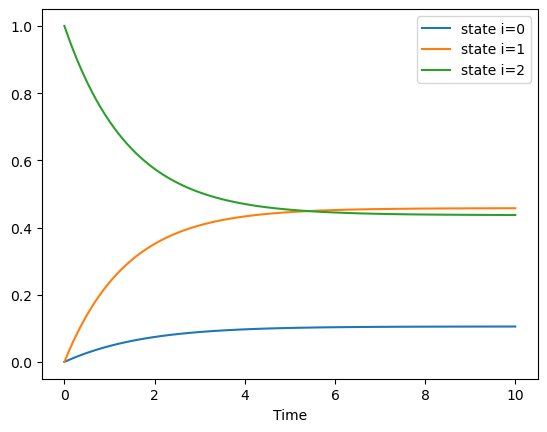

In [5]:
from scipy.integrate import odeint
p0 = np.array([0., 0., 1])
T = np.linspace(0,10,101)
def dpdt(p,t):
    return Q.dot(p)
    
sol = odeint(dpdt, p0, T)

for i in range(n):
    plt.plot(T, sol[:,i], label=f'state {i=}')
plt.xlabel('Time')
plt.legend();

## Analytical solution

The Markovian system above is a linear equation that can be solved analytically through decomposition into its eigenvectors. 
In general, the matrix $Q$ is not symmetric and the left $v^k$ and right $w^k$ eigenvectors are different.
Left and right eigenvectors have distinct interpretations that we will now explore. 
For each eigenvalue $\lambda^k$, we have
$$
\lambda^k w^k_j = \sum_i Q_{ji} w^k_i \quad \lambda^k v^k_i = \sum_j v^k_j Q_{ji}
$$
Left and right eigenvectors are orthogonal if they correspond to different eigenvalues. 
We can normalize the eigenvectors such that $\sum_i v_i^k w_i^l=\delta_{kl}$ and we will assume below that eigenvectors are orthonormal.

Furthermore, we can express $Q$ as
$$
Q_{ji} = \sum_k w_{j}^k \lambda^k v^k_i
$$
This is readily verified by mulitplying $Q$ from the right or left with the respective eigenvectors, which immediately reduces to the equation for the eigenvector (e.g. $\sum_i Q_{ji}w^l_i = \sum_{k,i} w_{j}^k \lambda^k v^k_i w^l_i = \sum_k w_{j}^k \lambda^k \delta_{kl} = \lambda^l w^l_j$ -- this holds vor all $l$ and left and right eigenvectors). 

Furthermore, since $w_i^k$ are linearly independent and form a basis, we can decompose $p_i(t)$ into a linear superposition of the right eigenvalues
$$
p_i(t) = \sum_k a^k(t) w_i^k
$$
Plugging this into the evolution equation, we have
$$
\sum_k \frac{d a_k(t)}{dt} w_j^k = \sum_k \sum_l w_{j}^l \lambda^l v^l_i a^k(t) w_i^k = \sum_k w_{j}^k \lambda^k a^k(t) \, ,
$$
where we have used the orthonormality from above. 
Since the different $w_j^k$ are linearly independent, it follows that $a^k(t) = e^{\lambda^k t} a^k(0)$.
The $a^k(0)$ are given by projecting $p_i(0)$ on the left eigenvectors $a^k = \sum_i v_i^k p_i(0)$. The analytic solution of the Master equation is therefore
$$
p_i(t) = \sum_k a^k e^{\lambda^k t} w_i^k = \sum_k \sum_j v_j^k p_j(0) e^{\lambda^k t} w_i^k
$$


*We'll verify this in the code snippet below!*

In [8]:
def orthonormal_eigenvectors(Q):
    # calculate left v and right w eigenvectors (l1 and l2 are the eigenvalues, same in both cases)
    l, v, w = linalg.eig(Q, left=True, right=True)
    #print("eigenvalues", np.round(l,5))

    # normalize the left eigenvectors to sum to one, right eigenvectors to the lefts evs
    w_norm = np.array([x/np.abs(x).sum() for x in w.T])
    v_norm = np.array([x/(x.dot(y)) for x,y in zip(v.conj().T, w_norm)])

    # v_norm and w_norm now contain one eigenvector in each row --> easier to iterate later
    # left eigenvectors are complex conjugates
    return l, v_norm, w_norm

l, v, w = orthonormal_eigenvectors(Q)
# as required, w and v are orthonormal now (vectors are now rows of v_norm and w_norm for easier indexing)
print("left and right eigenvectors are orthonormal")
print(np.round(v.T.dot(w), 4)) 
print(np.round(v, 4))

left and right eigenvectors are orthonormal
[[ 1.  0. -0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.      1.      1.    ]
 [10.2507 -4.339   2.0709]
 [ 9.377  -5.2127  3.1972]]


Text(0.5, 0, 'time')

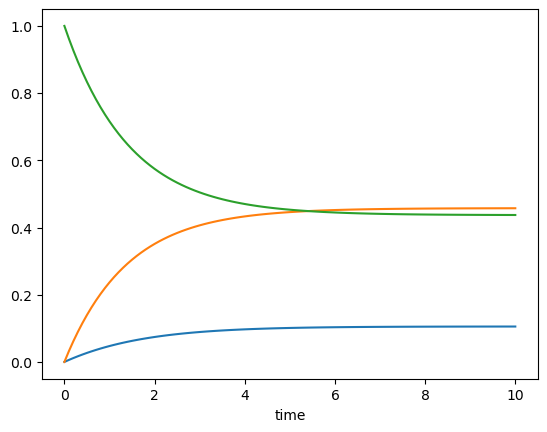

In [9]:
# accumulate the solution in a matrix with each state as row and time points as columns
analytic_sol = np.zeros((n, len(T)), dtype='complex128')
ak = [vk.dot(p0) for vk in v]

# sum the different eigenmodes
for lk, ak, wk in zip(l, ak, w):
    analytic_sol += ak*np.outer(wk, np.exp(lk*T))

# plot the results
plt.figure()
plt.plot(T, np.real(analytic_sol.T))
plt.xlabel('time')
# the result should look exactly like the one above

### Stationary distribution
Note that there is one eigenvalue that is zero (or at least within numerical accuracy). Furthermore, this eigenvalue corresponds to a left eigenvectors whose elements are just $v^0 = [1,1,1,\ldots,1]$ (or the negative of it, which corresponds to a flipped right eigenvector). 
This is a necessary consequence of the properties of the stochastic matrix that conserves probability:
$$
0 = \sum_i Q_{ik} = \sum_i v_i^0 Q_{ik}
$$
The corresponding right eigenvalue is the equilibrium distribution $p_i = w_i^0$ with
$$
\sum_i Q_{ji} p_i = 0
$$
All other eigenmodes decay at large times. 

In [7]:
stat_index = np.where(np.abs(l)<1e-10)[0][0]
print("left ev:", v[stat_index])
print("equilibrium:", w[stat_index])
print("numerical:", sol[-1])

left ev: [1.-0.j 1.-0.j 1.-0.j]
equilibrium: [0.27576453+0.j 0.2793868 +0.j 0.44484867+0.j]
numerical: [0.27576453 0.2793868  0.44484867]


### Backward dynamics
Above, we have established that the probability distribution $p_i(t)$ over our discrete state set at time $t$, given we started with a distribution $p_j(0)$, is given by 
$$
p_j(t) = \sum_i {(e^{Qt})}_{ji} \; p_i(0)
$$
In particular, the probability that we started in state $i$ and ended up in state $j$ is the matrix exponential $e^{Qt}_{ji}$. For large $t$, $e^{Qt}_{ji}p_i = w_j^0$ for any normalized vector $p_i$, as expected. 

But what about looking back in time? Say we observed the system in state $j$ at time $t$, what does that tell us about it's likely state at an earlier time $\tau$? 

Using the Chapman-Kolmogorov equation above, but this time expanding around the initial time point, we know that the probability of being in state $j$ at time $t$, given we started in state $i$ at time $\tau$ can be expressed as:
$$
\begin{split}
P\left(\{j,t\}| \{i, \tau\}\right) & =\sum_k P\left(\{j,t\}| \{k,\tau + \Delta t \}\right)\times  P\left(\{k,\tau + \Delta t\}|\{i, \tau \}\right) \\
& = \sum_k  \left[ P\left(\{j,t\}|\{k, \tau\}\right) + \Delta t \frac{d}{d\tau} P\left(\{j,t\}|\{k, \tau \} \right) \right] \times \left[ \delta_{ki} + Q_{ki}(\tau)\Delta t\right] 
\end{split}
$$
Going back to the matrix notation, we have
$$
\frac{d}{d\tau} P\left(\{j,t\}|\{i, \tau \} \right) =  - \sum_k P\left(\{j,t\}|\{k, \tau \} \right) Q_{ki}(\tau) 
$$
In other words, we discover a very similar linear system, but with the transposed matrix (the minus sign has to do with the fact that the time interval $t-\tau$ gets smaller as $\tau$ increases). At early times $\tau$, $P\left(\{j,t\}|\{i, \tau \} \right)$, viewed as a function of $i$, approaches the left eigenvalue $v_i^0$. This eigenvalue is flat, implying that the state far in the past has no information about the state in the present. 

Summarizing the backwards and forward dynamics:
 - **Forward**: $P\left(\{j,t\}|\{i, \tau \} \right)$ as a function of $j$ and $t$ describes the probability of observing $j$ at time $t$ if the system was in state $i$ at time $\tau$. For large $t-\tau$, this approaches the equilibrium distribution.
 - **Backward**:  $P\left(\{j,t\}|\{i, \tau \} \right)$ as a function of $i$ and $\tau$ described the likelihood of the of the ancestral state $i$ given we have observed $j$ at time $t$. In the limit of large $t-\tau$, this approaches a flat distribution. The probability of the ancestral state $i$ at large $t-\tau$ is of course also given by the equilibrium distribution and is not flat in general. This is reconciled by remembering that the joint distribution $P\left(\{j,t\}; \{i, \tau \} \right) = P\left(\{j,t\}|\{i, \tau \} \right) P(\{i,\tau\})$.



## Fluxes and detailed balance
In its general form, a stochastic system described by a transition matrix $Q_{ji}$ will have an equilibrium steady state with fluxes, e.g. there might be a higher probability of going from $A$ to $B$ than vice versa. Such net fluxes at equilibrium are associated with entropy production and can not occur in a closed physical system at equilibrium. 

![image](./figures/detailed_balance.png)

Instead, such systems obey [Detailed Balance](https://en.wikipedia.org/wiki/Detailed_balance), the condition that every flux is balanced by a reverse flux and that every net-flux is zero at equilibrium.
This requires (no summation over $i$ or $j$)
$$
Q_{ji}p^0_i = Q_{ij}p^0_j
$$
The general matrix $Q$ has $n(n-1)$ free parameters (the diagonal is constrained by conservation of probability). The detailed balance conditions impose $n(n-1)/2$ constraints. However, while the $p^0_i$ were previously determined by $Q$, they enter the above constraints as new free parameters that need to sum to 1. 
The total number of free parameters of a time reversible model is thus $n(n+1)/2 - 1$

![image](./figures/GTR.png)


### Generalised time reversible models
A convenient and compact way to encode a stochastic matrices that obey detailed balance is by parameterization as a symmetric matrix $W_{ji}$ and the equilibirium probabilities $p^0_j$.
The transition matrix $Q_{ji}$ defined as
$$
Q_{ji} = p^0_j W_{ji}
$$
will obey detailed balance since
$$
Q_{ji}p^0_i = p^0_j W_{ji}p^0_i = Q_{ij}p^0_j
$$
since $W_{ji} = W_{ij}$.

These [Generalised Time Reversible (GTR)](https://en.wikipedia.org/wiki/Substitution_model#Generalised_time_reversible) models are often used to describe the evolution of nucleotide characters in biological sequences. 



### Ergodic Markov chains
Above, we implicitly considered a particular type of Markov chain where the system can move from any state to any other state. The same would not be true of the matrix $Q$ had a block structure with only one-directional transitions between subsets of states. In an ergodic system, there is only one eigenvalue that is zero, and the corresponding stationary distribution is positive for each state, that is some probability to observed the system in each state. 


## Absorbing Markov chains
Any column of the matrix $Q$ that is uniformly zero corresponds to an absorbing state of the Markov chain: once the system reached that state, it will never leave. There can, in principle, be multiple such absorbing states. An interesting question in such systems is how often and after what time which absorbing state is reached.
Consider a matrix $Q$ with $m$ absorbing states ($1, 2, m$) of the form
$$
Q =  \left(\begin{array}{ c | c }
    0 & R\\
    \hline
    0 & S
  \end{array}\right)
$$
where $S$ is the submatrix describing the transitions between the  $n-m$ non-absorbing states, $R$ are the transitions from the non-absorbing states to the $m$ absorbing states. 
Each absorbing state corresponds to one eigenvalue with $\lambda^k=0, \, k=1, \ldots m$, we have therefore degenerate eigenvectors that span the subspace of absorbing states. These eigenvalues, however, matter only for initial conditions in the aborbing states. The matrix is $Q$ is fully determined by the non-absorbing eigenmodes. 
$$
Q_{ji} = \sum_{k>m} w^k_j \lambda_k v^k_i
$$
It is worth noting that $v^k_i$ vanish for $k>m$ and $i\leq m$. Note also that the $(n-m) \times (n-m)$ matrix $S$ is full-rank, that its eigenvalues are $\lambda_k$ ($k>m$) are negative, and the corresponding left and right eigenvalues are $v^k_j$ and $w^k_j$ with $k,j>m$.

From these properties follow a number of interesting and elegant results. The solution of the system is still given by 
$$
p_j(t) = \sum_{k} a^k e^{\lambda^k t} w^k_j\, ,
$$


In [18]:
n=5
m=2
Q_ab = random_stochastic_matrix(n, m)

l_ab, v_ab, w_ab = orthonormal_eigenvectors(Q_ab)

print(np.round(l_ab, 3))

print(np.round(w_ab, 3))


[ 0.   +0.j  0.   +0.j -2.817+0.j -2.064+0.j -0.971+0.j]
[[ 1.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.   ]
 [ 0.086 -0.006  0.162  0.253 -0.494]
 [ 0.165  0.007 -0.331  0.328 -0.169]
 [ 0.295  0.205 -0.177 -0.13  -0.193]]


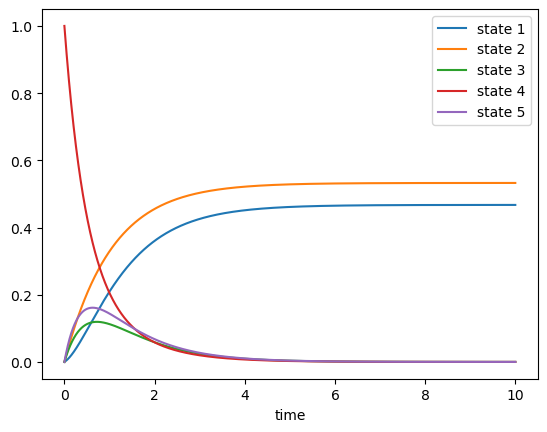

In [19]:
#
p0 = np.array([0., 0., 0, 1, 0])
T = np.linspace(0,10,5001)

# accumulate the solution in a matrix with each state as row and time points as columns
analytic_sol = np.zeros((n, len(T)), dtype='complex128')
ak = [vk.dot(p0) for vk in v_ab]

# sum the different eigenmodes
for lk, ak, wk in zip(l_ab, ak, w_ab):
    analytic_sol += ak*np.outer(wk, np.exp(lk*T))

# plot the results
plt.figure()
plt.plot(T, np.real(analytic_sol.T))
plt.xlabel('time')
plt.legend([f'state {k+1}' for k in range(n)])

### Time spent in state $j$ before absorption
Since the system is certain to be absorbed in one of the absorbing states $j=1\ldots m$, the time spent in any of the states $j>m$ is finite and given by
$$
\langle t_j\rangle = \int_0^\infty p_j(t) dt = \int_0^\infty  \sum_{k>m} a^k e^{\lambda_k t} w^k_j\, dt = -\sum_{k>m} \frac{a^k w^k_j}{\lambda_k} 
$$
Remember that the coefficients $a^k = \sum_i v^k_i p_i(0)$ are determined by the initial condition. Substituting this 
$$
\langle t_j\rangle = - \sum_i p_i(0) \sum_{k>m} \frac{1}{\lambda_k} v^k_i w^k_j = -S^{-1}_{ji}p_i(0)
$$
where we have used that the inverse of matrix $S$ is given by the outer product of its left and right eigenvectors with the inverse eigenvalues. 
The expected total time to absorbtion is sum of the times spent in different states. 

The matrix $S^{-1}$ is also called the **Fundamental Matrix** of an absorbing Markov Chain. 

In [20]:
S = Q_ab[m:, m:]
Sinv = np.linalg.inv(S)

# numerical intergral from above
mean_t = np.sum(np.diff(T)*analytic_sol[m:, :-1], axis=1)
print("numeric integration:", mean_t, " (Errors are due to the simple minded integration)")
Sinv_analytic = np.sum([np.outer(wk[m:], vk[m:])/lk for lk,vk,wk in zip(l_ab[m:], v_ab[m:], w_ab[m:])], axis=0)
print("fundamental matrix:", -Sinv_analytic.dot(p0[m:]))
print("numerical inverse:", -Sinv.dot(p0[m:]))


numeric integration: [0.24491586+0.j 0.65673855+0.j 0.3077765 +0.j]  (Errors are due to the simple minded integration)
fundamental matrix: [0.24494522-0.j 0.65575936-0.j 0.30780859-0.j]
numerical inverse: [0.24494522 0.65575936 0.30780859]


### First passage times
It is often of interest how long it takes on average for the random variable to first reach a particular state (state $1$). For this purpose, it is convenient to modify the matrix $Q$ such that this state is absorbing, which corresponds the case of $m=1$ we studied above. 

The rate at which the system then accumulates in state $1$ is $dp_1/dt = Q_{1i}p_i$ and $dp_1/dt$ is density of arriving at state $1$. It's mean, known as *mean first passage time* from the initial state to state $1$ is given by
$$
\int_0^\infty dt \, t \frac{dp_1(t)}{dt} = \int_0^\infty dt \, \left(1-p_1(t)\right) = \sum_{k>1} \frac{a^k}{\lambda_k} w^k_1 = \sum_i  \sum_{k>1} \frac{w^k_1  v^k_i}{\lambda^k} p_i(0)
$$
This quantity is closely related to the inverse of $S_{ji}$, but not quite since the full matrix $Q$ is singular. 

In [21]:
n=5
m=1
Q_ab = random_stochastic_matrix(n, m)
l_ab, v_ab, w_ab = orthonormal_eigenvectors(Q_ab)

print(np.round(l_ab, 3))
print(np.round(v_ab.T.dot(w_ab), 3))

[ 0.   +0.j -3.709+0.j -0.569+0.j -1.728+0.j -2.52 +0.j]
[[ 1.  0.  0.  0.  0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1.  0.  0.]
 [-0. -0.  0.  1.  0.]
 [-0.  0.  0.  0.  1.]]


numerical first passage time 2.125145809166992
analytical: (2.136777149141915+0j)


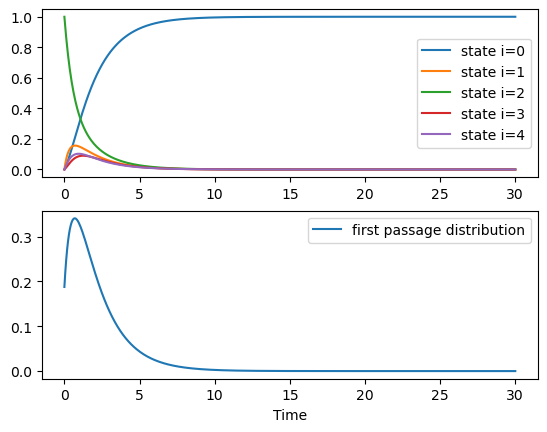

In [22]:
from scipy.integrate import odeint
p0 = np.array([0., 0., 1., 0., 0])
T = np.linspace(0,30,501)
def dpdt(p,t):
    return Q_ab.dot(p)
    
sol = odeint(dpdt, p0, T)

fig, axs = plt.subplots(2,1)
for i in range(n):
    axs[0].plot(T, sol[:,i], label=f'state {i=}')

dp0dt = dpdt(sol.T, 0)[0]
# numerically determined first passage times
axs[1].plot(T, dp0dt, label='first passage distribution')
plt.xlabel('Time')
axs[0].legend();
axs[1].legend();

print('numerical first passage time', np.sum(T*dp0dt)/dp0dt.sum())

# calculate the analytical one by summing contributions of all non-zero eigenvalues
Sinv_analytic = np.sum([np.outer(wk, vk)/lk for lk, vk, wk in zip(l_ab[m:], v_ab[m:], w_ab[m:])], axis=0)
print('analytical:', Sinv_analytic.dot(p0)[0])
